In [1]:
import os
from os import path
import json

import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
DATASET_DIR = "../../fakenewsnet_dataset"
DATASET_DIR = path.abspath( DATASET_DIR )

NEWS_DIR = f"{DATASET_DIR}/politifact/fake"

In [3]:
def tree_size(root_node):

    node_count = 1 # itself

    children = [] + root_node["quoted_by"] + root_node["replied_by"] + root_node["retweeted_by"]
    for child in children:
        node_count += tree_size(child)

    return node_count

In [4]:
news_count = 0
sizes = []
news_texts = []
for item in os.listdir(NEWS_DIR):
    news_dir_path = f"{NEWS_DIR}/{item}"
    
    if path.isdir(news_dir_path):

        if not path.exists(f"{news_dir_path}/news content.json"):
            continue

        if not path.exists(f"{news_dir_path}/cascade.json"):
            continue

        news_count += 1
        print(f"{news_count}: {item}")
#         if news_count > 5:
#             break

        with open(f"{news_dir_path}/news content.json", "r") as news_file:
            news_texts.append(json.loads(news_file.read())["text"])

1: politifact13038
2: politifact13467
3: politifact13468
4: politifact13475
5: politifact13496
6: politifact13501
7: politifact13515
8: politifact13557
9: politifact13559
10: politifact13560
11: politifact13561
12: politifact13565
13: politifact13576
14: politifact13577
15: politifact13584
16: politifact13591
17: politifact13593
18: politifact13600
19: politifact13601
20: politifact13608
21: politifact13617
22: politifact13663
23: politifact13687
24: politifact13698
25: politifact13703
26: politifact13711
27: politifact13720
28: politifact13731
29: politifact13744
30: politifact13747
31: politifact13751
32: politifact13765
33: politifact13766
34: politifact13773
35: politifact13775
36: politifact13784
37: politifact13794
38: politifact13806
39: politifact13807
40: politifact13815
41: politifact13816
42: politifact13823
43: politifact13827
44: politifact13836
45: politifact13853
46: politifact13854
47: politifact13893
48: politifact13897
49: politifact13913
50: politifact13921
51: polit

In [5]:
all_words_text = " ".join(news_texts)

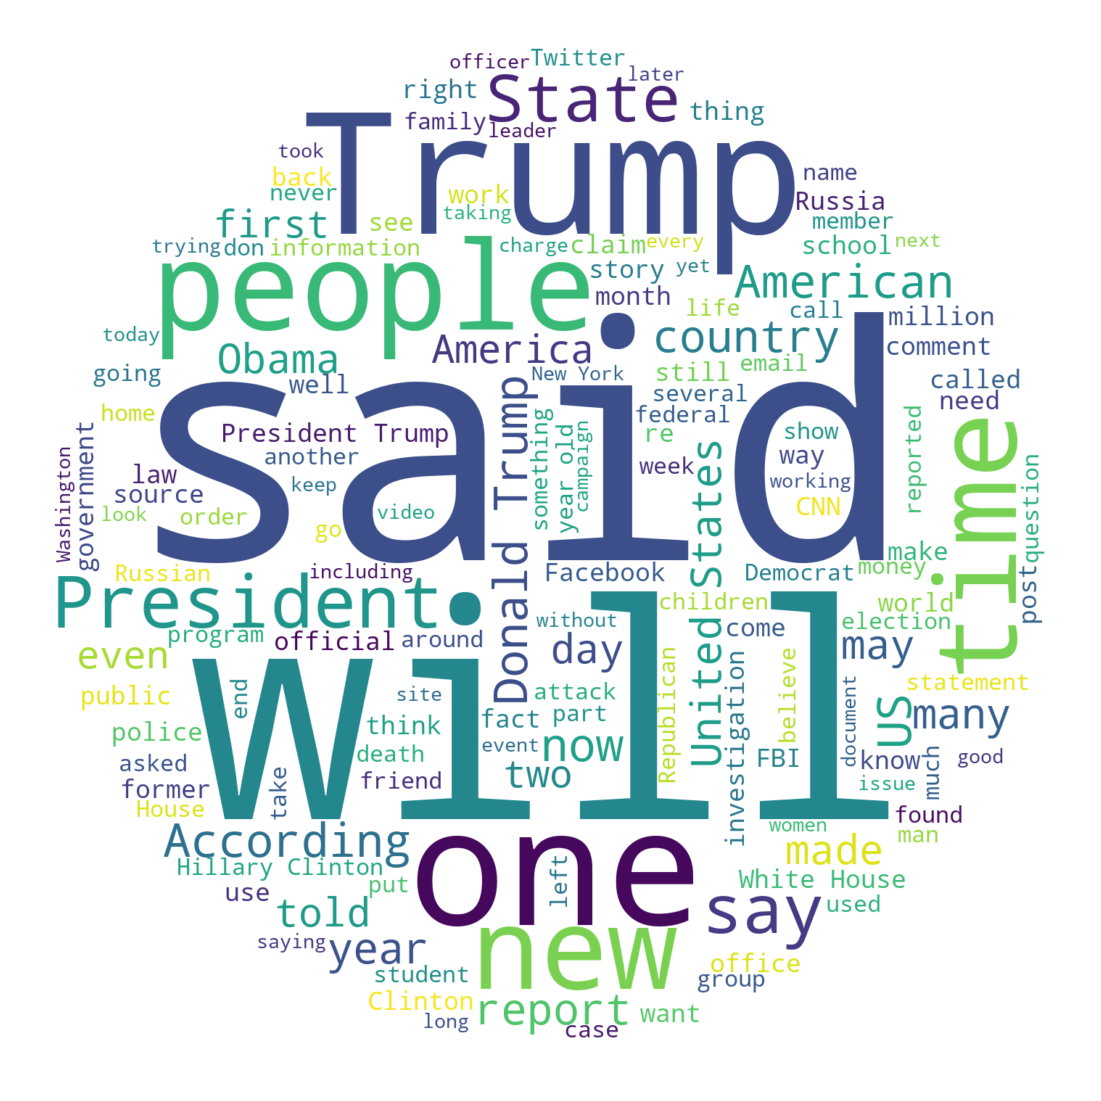

In [16]:
x, y = np.ogrid[:1500, :1500]

mask = (x - 750) ** 2 + (y - 750) ** 2 > 700 ** 2
mask = 255 * mask.astype(int)

wordcloud = WordCloud(max_words=150, background_color="white", mask = mask, width=1500, height=1500).generate(all_words_text)
plt.figure( figsize=(20,20) )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

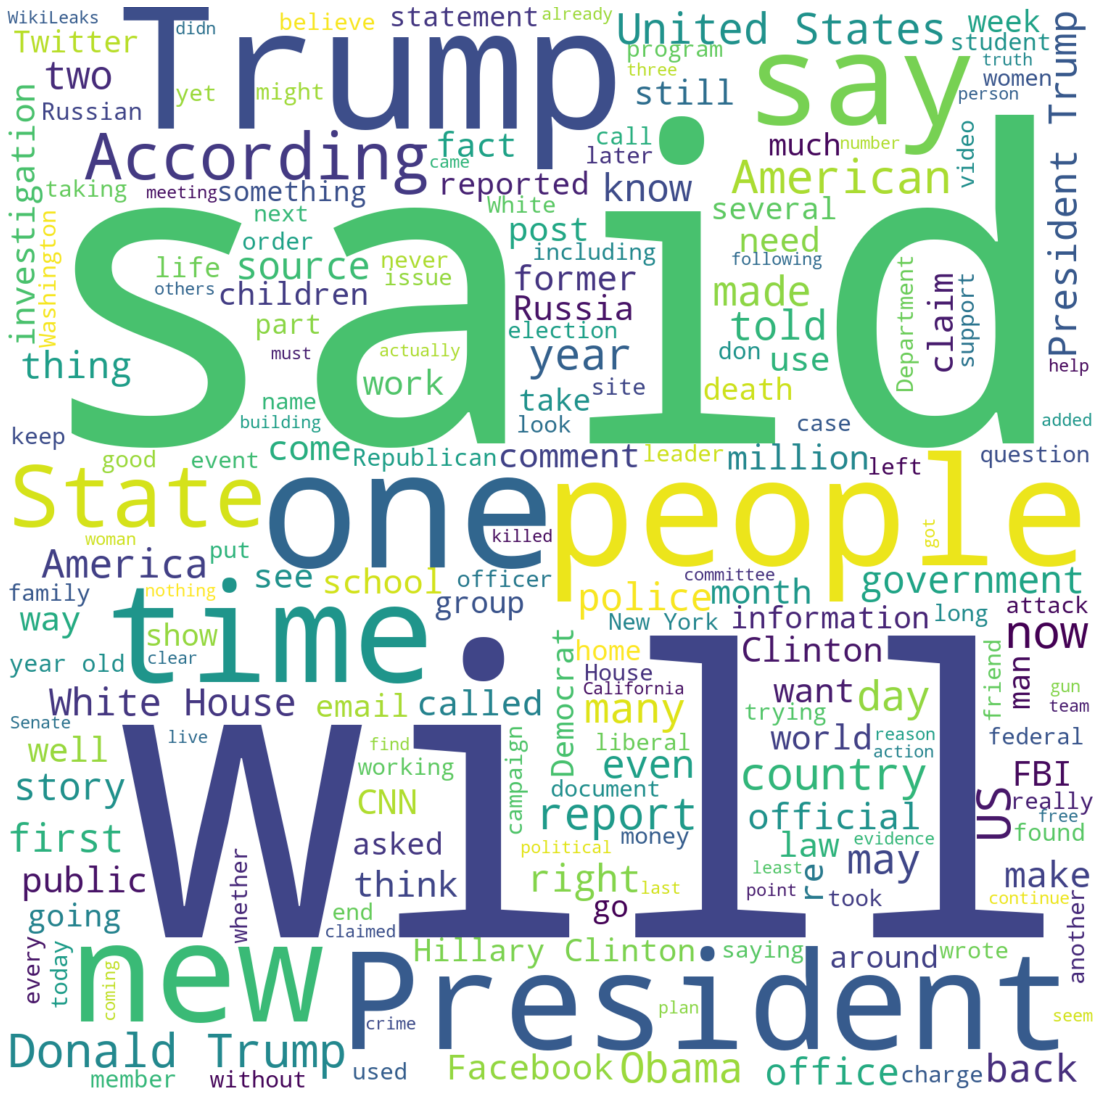

In [18]:
wordcloud = WordCloud(max_words=200, background_color="white", width=1500, height=1500).generate(all_words_text)
plt.figure( figsize=(20,20) )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()